### Initial setup

In [1]:
# pip install wikipedia-api
import wikipediaapi
wiki_wiki = wikipediaapi.Wikipedia('en')
page_py = wiki_wiki.page('George W. Bush')
print("Page - Exists: %s" % page_py.exists())

Page - Exists: True


In [2]:
print("Page - Title: %s" % page_py.title)

Page - Title: George W. Bush


In [3]:
print("Page - Summary: %s..." % page_py.summary[:500])

Page - Summary: George Walker Bush (born July 6, 1946) is an American politician and businessman who served as the 43rd president of the United States from 2001 to 2009. A member of the Republican Party, he had previously served as the 46th governor of Texas from 1995 to 2000. Bush is frequently referred to as George W. Bush, Bush Junior, or Bush 43 to distinguish him from his father, George H. W. Bush, who served as the 41st president of the United States from 1989 to 1993.  
Bush is the eldest son of Barbara ...


### Goal: find all noun phrases in the specified article

In [4]:
# Tokenize article
import nltk
from nltk.tokenize import sent_tokenize,word_tokenize
tokens = sent_tokenize(page_py.text) # create list of the sentenses
words = word_tokenize(page_py.text) # create list of words

#### Visualize

(array([ 4., 11., 26., 21., 41., 51., 49., 48., 42., 29., 26., 23., 18.,
        25., 17., 13., 11., 12.,  8.,  7.,  6.,  9.,  5.,  2.,  2.,  4.,
         2.,  1.,  2.,  2.,  0.,  2.,  1.,  0.,  2.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  4.  ,  20.68,  37.36,  54.04,  70.72,  87.4 , 104.08, 120.76,
        137.44, 154.12, 170.8 , 187.48, 204.16, 220.84, 237.52, 254.2 ,
        270.88, 287.56, 304.24, 320.92, 337.6 , 354.28, 370.96, 387.64,
        404.32, 421.  , 437.68, 454.36, 471.04, 487.72, 504.4 , 521.08,
        537.76, 554.44, 571.12, 587.8 , 604.48, 621.16, 637.84, 654.52,
        671.2 , 687.88, 704.56, 721.24, 737.92, 754.6 , 771.28, 787.96,
        804.64, 821.32, 838.  ]),
 <a list of 50 Patch objects>)

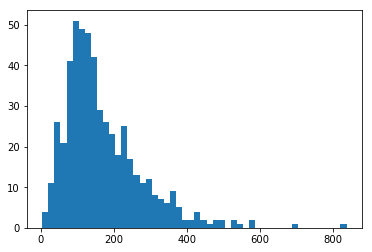

In [5]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

tokens_len = []
for i in tokens:
    tokens_len.append(len(i))
plt.hist(tokens_len, bins=50)

#### Filter out stop words

In [6]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
filtered_words = [w for w in words if not w in stop_words]

#### Get PoS

In [7]:
from nltk import pos_tag
tagged_words = nltk.pos_tag(filtered_words)

#### Perform NP chunking

In [8]:
from nltk.chunk import RegexpParser
%xmode verbose
# Optional determiner, followed by any number of adjectives 
# and then a noun
n_gram_parser = RegexpParser("NP: {<DT>?<JJ>*<NN>}")
n_chunks = n_gram_parser.parse(tagged_words)

Exception reporting mode: Verbose


In [10]:
def getNPs(parent):
    for node in parent:
        if type(node) is nltk.Tree:
            if node.label() == 'NP':
                print (str(node.leaves()))
            getNodes(node)
            
getNPs(n_chunks)

[('American', 'JJ'), ('politician', 'NN')]
[('businessman', 'NN')]
[('president', 'NN')]
[('A', 'DT'), ('member', 'NN')]
[('governor', 'NN')]
[('distinguish', 'NN')]
[('father', 'NN')]
[('president', 'NN')]
[('son', 'NN')]
[('second', 'JJ'), ('son', 'NN')]
[('become', 'JJ'), ('American', 'JJ'), ('president', 'NN')]
[('father', 'NN')]
[('oil', 'NN')]
[('industry', 'NN')]
[('baseball', 'NN')]
[('team', 'NN')]
[('gubernatorial', 'JJ'), ('election', 'NN')]
[('president', 'NN')]
[('decision', 'NN')]
[('stop', 'NN')]
[('recount', 'NN')]
[('fourth', 'JJ'), ('person', 'NN')]
[('president', 'NN')]
[('response', 'NN')]
[('terrorist', 'NN')]
[('war', 'NN')]
[('Signature', 'JJ'), ('legislation', 'NN')]
[('presidency', 'NN')]
[('broad', 'JJ'), ('tax', 'NN')]
[('relief', 'NN')]
[('program', 'NN')]
[('presidential', 'JJ'), ('race', 'NN')]
[('close', 'JJ'), ('election', 'NN')]
[('re-election', 'NN')]
[('criticism', 'NN')]
[('political', 'JJ'), ('spectrum', 'NN')]
[('criticism', 'NN')]
[('control', 'NN

[('constitution', 'NN')]
[('surge', 'NN')]
[('job', 'NN')]
[('program', 'NN')]
[('reconstruction', 'NN')]
[('second-ever', 'JJ'), ('veto', 'NN')]
[('reject', 'NN')]
[('bill', 'NN')]
[('debate', 'NN')]
[('conflict', 'NN')]
[('presence', 'NN')]
[('crucial.In', 'NN')]
[('government', 'NN')]
[('bold', 'JJ'), ('decision', 'NN')]
[('moment', 'NN')]
[('history', 'NN')]
[('end', 'JJ'), ('military', 'JJ'), ('buildup', 'NN')]
[('summer', 'NN')]
[('pension', 'NN')]
[('law', 'NN')]
[('de-Baathification', 'NN')]
[('law', 'NN')]
[('new', 'JJ'), ('budget', 'NN')]
[('amnesty', 'JJ'), ('law', 'NN')]
[('measure', 'NN')]
[('stage', 'NN')]
[('number', 'NN')]
[('war', 'NN')]
[('stability', 'NN')]
[('Surveillance', 'NN')]
[('executive', 'NN')]
[('order', 'NN')]
[('The', 'DT'), ('new', 'JJ'), ('directive', 'NN')]
[('monitor', 'NN')]
[('warrant', 'NN')]
[('program', 'NN')]
[('original', 'JJ'), ('legal', 'JJ'), ('opinion', 'NN')]
[('apply', 'JJ'), ('time', 'NN')]
[('war', 'NN')]
[('program', 'NN')]
[('basis', 